# 1. Импорт данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")
sample_submition = pd.read_csv('sample_submission.csv')

# посмотрим 7 случаных строк в датасете
train_df.sample(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1417,1418,60,RL,NaN,16545,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,340000
37,38,20,RL,74.0,8532,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,153000
865,866,20,RL,NaN,8750,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal,148500
1411,1412,50,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,9,2009,WD,Normal,140000
121,122,50,RM,50.0,6060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,100000
1006,1007,20,RL,NaN,12155,Pave,NaN,IR3,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,163500
933,934,20,RL,63.0,8487,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,190000


In [3]:
# и тут
test.sample(7)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
282,1743,160,FV,35.0,3768,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
152,1613,20,RL,NaN,11875,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
422,1883,60,RL,70.0,8749,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
689,2150,20,RL,82.0,20270,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
691,2152,30,RL,85.0,19550,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
372,1833,70,RM,57.0,6876,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,8,2009,WD,Normal
584,2045,20,RL,NaN,15387,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,450,8,2008,WD,Normal


In [4]:
# узнаем размерность датасета
print(f"Size dataset: {train_df.shape}")

Size dataset: (1460, 81)


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

По информации сверху видно, что у меня 38 числовых данных и 43 категориальных. 

In [6]:
train_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Посмотрим на статистику

In [4]:
train_df.describe(include=np.number)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# посмотрим на статистику категориальных данных
train_df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [9]:
train_df.duplicated().sum()

0

# Объединение тестовой и тренировочный выборки.


У нас есть 2 набора данных: train и test. Произведу объединение 
тих дата сетов для более быстрой очистки данных.

In [5]:
#выделение ключевой переменной
target = train_df['SalePrice']
test_id = test['Id']

train_new = train_df.drop(['SalePrice', 'Id'], axis=1)
test_new = test.drop('Id', axis=1)

data = pd.concat([train_new, test_new], axis=0).reset_index(drop=True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


Ниже это те столбцы, в которых хранятся нечисловые данные

In [11]:
data.select_dtypes('object').loc[:, data.isna().sum() > 0 ].columns

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

Так как после объединения данных у нас появилось много шумов и мусора, то данные стоит почистить.
Для этого заменим промущенные данные None - в категориальном случае и 0 - в для количественных признаков.

In [6]:
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure', 
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType', 
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC', 
    'Fence', 
    'MiscFeature'
]:
    data[column] = data[column].fillna('None')
    
for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    data[column] = data[column].fillna(data[column].mode()[0])    

In [13]:
#Проверка очистки
data.select_dtypes('object').isna().sum().sum()

0

In [46]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal


Далее, создадим функцию которая будет заполнять пропущенные значения.
Для этого я использую алгоритм KNN. KNN используется для задачи классификации и регрессии.
Алгоритм находит расстояния между запросом и всеми примерами в данных, выбирая определенное количество примеров (k), наиболее близких к запросу, затем голосует за наиболее часто встречающуюся метку (в случае задачи классификации) или усредняет метки (в случае задачи регрессии).
Так как данных у меня не так много, то данный алгоритм будет неплохим решением.

In [50]:
from sklearn.neighbors import KNeighborsRegressor
data_new = data.copy()

data_new.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

In [51]:
data_new.isna().sum().sum()

678

In [52]:
def knn_imput(df, target):   
    
    df = df.copy()
     
    num_df = df.select_dtypes(np.number)
    nt_na_col = num_df.loc[:, num_df.isna().sum() == 0].columns
    #то что мы хотим предсказать
    y_train = num_df.loc[num_df[target].isna() == False, target]
    
    # сами данные
    x_train = num_df.loc[num_df[target].isna() == False, nt_na_col]
    x_test = num_df.loc[num_df[target].isna() == True, nt_na_col]
    
    knn = KNeighborsRegressor()
    knn.fit(x_train, y_train)
    
    y_pred = knn.predict(x_test)
    
    df.loc[df[target].isna() == True, target] = y_pred
    
    return df

In [53]:
#заполнение данных в пустых строчках
for column in data_new.columns[data_new.isna().sum() > 0]:
    data_new = knn_imput(data_new, column)

In [54]:
data_new

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal


In [55]:
data_new.isna().sum().sum()

0

# Feature Engineering

In [10]:
data_new ['SqRoom'] = data_new['GrLivArea'] / (data_new['FullBath'] + data_new['HalfBath'] + 
                                               data_new['KitchenAbvGr'] + data_new['TotRmsAbvGrd'])

data_new['Total_Homa_Quality'] = data_new['OverallCond'] + data_new['OverallQual']

data_new['Total_Bathroom'] = (data_new['FullBath'] + 0.5 * data_new['HalfBath'] + data_new['BsmtFullBath'] + 0.5 * data_new['BsmtHalfBath'])

data_new['HighQualSf'] = data_new['1stFlrSF'] + data_new['2ndFlrSF']

# Преобразование объектов

После очистки данных нам нужно нормализовать данные.
Для этого можно посмотреть на ассиметрию. Если она отрациательная,то смещение наблюдается в правой стороне, при положительной - в левой.

![Пример](https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png)


In [11]:
import scipy.stats
skew_df = pd.DataFrame(data_new.select_dtypes(np.number). columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feat: scipy.stats.skew(data_new[feat]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,MSSubClass,1.375457,1.375457,True
1,LotFrontage,1.340324,1.340324,True
2,LotArea,12.822431,12.822431,True
3,OverallQual,0.197110,0.197110,False
4,OverallCond,0.570312,0.570312,True
5,YearBuilt,-0.599806,0.599806,True
6,YearRemodAdd,-0.451020,0.451020,False
7,MasVnrArea,2.603460,2.603460,True
8,BsmtFinSF1,1.425383,1.425383,True
9,BsmtFinSF2,4.146143,4.146143,True


In [57]:
print(skew_df['Skew'].mean())

2.9342089344174545


Я буду использовать такое преобразование так, как у меня очень много данных, равных нулю, соотвественно я не могу использовать обычное логарифмирование

In [12]:
for column in skew_df.query('Skewed == True')['Feature'].values:
    data_new[column] = np.log1p(data_new[column])

#### Cos transform for cycle
Далее стоит пронормировать данные по месяцам, когда дома были проданы

In [59]:
data_new['MoSold'].median()

6.0

In [60]:
data_new['MoSold'] = (-np.cos(0.525 * data_new['MoSold']))

In [61]:
data_new['MoSold'].median()

0.5048461045998576

Преобразование категориальных переменных в фиктивные

In [14]:
data_new = pd.get_dummies(data_new)

Масштабирование

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_new)

data_new = pd.DataFrame(scaler.transform(data_new), index=data_new.index, columns=data_new.columns)

In [25]:
data_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.419418,-0.064594,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210052,0.783362,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-1.120845,0.535716,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804568,0.892580,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.419418,0.065707,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137809,0.658286,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.638691,-0.295522,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804568,0.387049,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.419418,0.677010,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430299,0.758241,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.821276,-3.284932,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804568,-1.418101,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,1.821276,-3.284932,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804568,0.438552,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,-1.120845,2.549373,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804568,0.967795,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,0.915540,-0.200957,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804568,0.535742,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


Target transformation

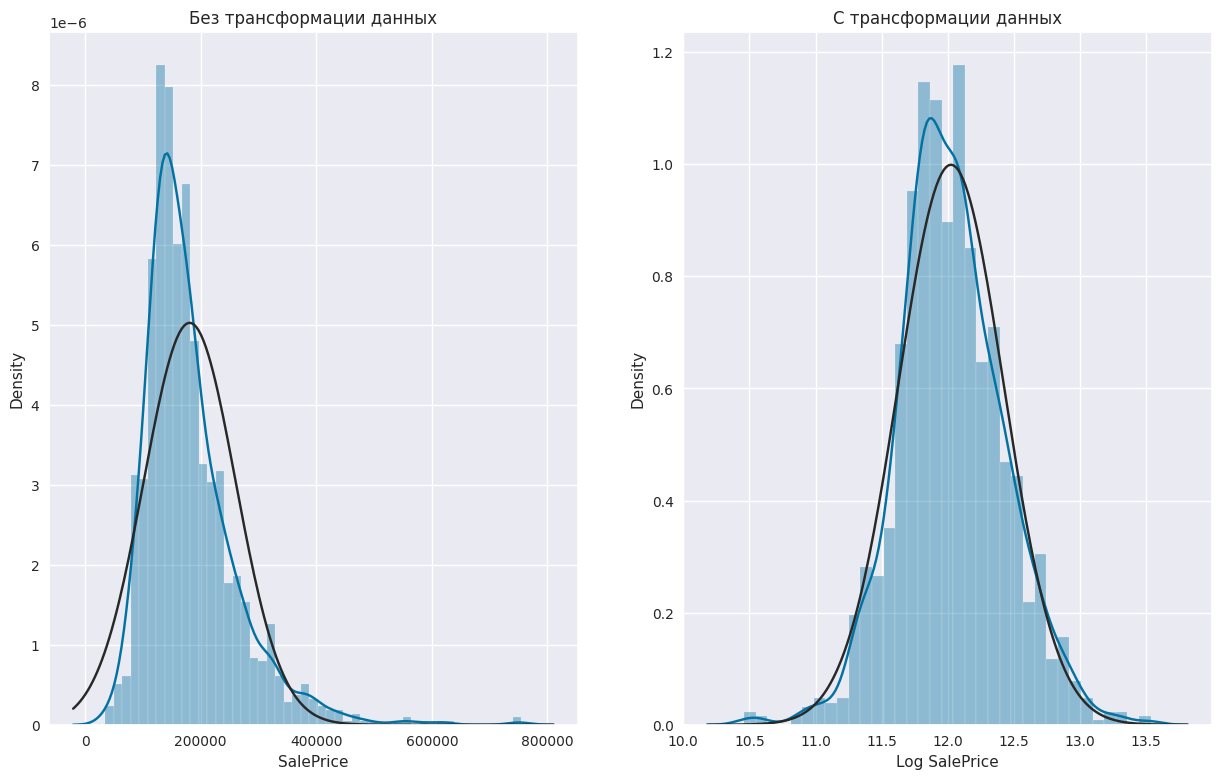

In [42]:
sns.set_style('darkgrid')

plt.figure(figsize=(15, 9))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Без трансформации данных")

lg_target = np.log(target)
plt.subplot(1, 2, 2)
sns.distplot(lg_target, kde=True, fit=scipy.stats.norm)
plt.xlabel('Log SalePrice')
plt.title("C трансформации данных")

plt.show()

# Разделение данных
После очитки и нормализации данных нужно будет разделить данные на тренировочные и тестовые.

In [17]:
train_final = data_new.loc[:train_df.index.max(), :].copy()
test_final = data_new.loc[train_df.index.max() + 1:, :].copy()

In [28]:
train_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.419418,-0.064594,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210052,0.783362,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,-1.120845,0.535716,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804568,0.892580,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.419418,0.065707,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137809,0.658286,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.638691,-0.295522,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804568,0.387049,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.419418,0.677010,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430299,0.758241,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.419418,-0.200957,-0.231508,-0.063185,-0.435439,0.911146,0.753229,-0.804568,-1.418101,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1456,-1.120845,0.711294,0.767440,-0.063185,0.454875,0.227056,0.178812,1.021025,0.821032,2.352717,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1457,0.638691,-0.020514,0.029092,0.646183,2.514892,-0.996100,1.040437,-0.804568,0.467747,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1458,-1.120845,0.065707,0.170303,-0.772552,0.454875,-0.696444,0.561757,-0.804568,-0.105476,3.331015,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [29]:
test_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,-1.120845,0.535716,0.521437,-0.772552,0.454875,-0.332070,-1.113625,-0.804568,0.645649,2.287158,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1461,-1.120845,0.571683,0.923625,-0.063185,0.454875,-0.431241,-1.257229,0.984363,0.873179,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1462,0.419418,0.310122,0.862607,-0.772552,-0.435439,0.846305,0.657493,-0.804568,0.821456,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1463,0.419418,0.462430,0.222291,-0.063185,0.454875,0.878733,0.657493,0.356386,0.729974,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1464,1.408728,-1.253125,-1.130892,1.355551,-0.435439,0.683917,0.370284,-0.804568,0.452832,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1.821276,-3.284932,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804568,-1.418101,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,1.821276,-3.284932,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804568,0.438552,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,-1.120845,2.549373,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804568,0.967795,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,0.915540,-0.200957,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804568,0.535742,-0.362565,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


Выбор модели

In [30]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 306 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(306)
memory usage: 3.4 MB


In [18]:
from pycaret.regression import setup, compare_models

In [19]:
_ = setup(data=pd.concat([train_final, lg_target], axis=1), target='SalePrice')

,Description,Value
0,Session id,2201
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 307)"
4,Transformed data shape,"(1460, 307)"
5,Transformed train set shape,"(1021, 307)"
6,Transformed test set shape,"(439, 307)"
7,Numeric features,306
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

Сравнение показало, что наиболее лучшая модель для решения моей задачи будет Orthogonal Matching Pursuit

In [20]:
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.model_selection import KFold, cross_val_score

In [21]:
kf = KFold(n_splits=10)

In [22]:
from sklearn import linear_model

In [23]:
second_model = linear_model.BayesianRidge()
second_model.fit(train_final, lg_target)

BayesianRidge()

In [24]:
first_model = OrthogonalMatchingPursuit()
first_model.fit(train_final, lg_target)

OrthogonalMatchingPursuit()

Hyper parameters optimization

In [25]:
import optuna

In [26]:
def objective(trial):
    #n_iter = trial.suggest_int('n_iter', 1, 5000),
    tol = trial.suggest_loguniform('tol', 1e-8, 10.0)
    alpha_1 = trial.suggest_loguniform('alpha_1', 1e-8, 10.0)
    alpha_2 = trial.suggest_loguniform('alpha_2', 1e-8, 10.0)
    lambda_1 = trial.suggest_loguniform('lambda_1', 1e-8, 10.0)
    lambda_2 = trial.suggest_loguniform('lambda_2', 1e-8, 10.0)
    
    model = linear_model.BayesianRidge(
        #n_iter=n_iter,
        tol=tol,
        alpha_1=alpha_1,
        alpha_2=alpha_2,
        lambda_1=lambda_1,
        lambda_2=lambda_2        
    )    
    
    model.fit(train_final, lg_target)
    cv_score = np.exp(np.sqrt(-cross_val_score(model, train_final, lg_target, scoring='neg_mean_squared_error', cv=kf)))
    
    return np.mean(cv_score)

In [ ]:
study = optuna.create_study(direction = 'minimize')
study.optimize(objective, n_trials = 100)

ValueError: Please set either 'minimize' or 'maximize' to direction. You can also set the corresponding `StudyDirection` member.

[I 2023-05-17 14:31:31,129] A new study created in memory with name: no-name-58389c56-4b9e-4d5a-bbab-8e96f6240c39
[I 2023-05-17 14:31:37,535] Trial 0 finished with value: 1.1440680918905355 and parameters: {'tol': 4.020637204097352e-06, 'alpha_1': 7.428907334701183e-08, 'alpha_2': 1.651402344719952e-08, 'lambda_1': 0.18328775312631407, 'lambda_2': 0.5755320643801463}. Best is trial 0 with value: 1.1440680918905355.
[I 2023-05-17 14:31:42,862] Trial 1 finished with value: 1.137932890462174 and parameters: {'tol': 0.0030906777493526416, 'alpha_1': 1.222226865043577, 'alpha_2': 0.00013383107042877303, 'lambda_1': 2.9738761990684712, 'lambda_2': 1.326293812304654e-08}. Best is trial 1 with value: 1.137932890462174.
[I 2023-05-17 14:31:48,951] Trial 2 finished with value: 1.1369107416579662 and parameters: {'tol': 0.0010626122013249687, 'alpha_1': 6.147450158085209, 'alpha_2': 5.377652290478471, 'lambda_1': 0.0011636680343228897, 'lambda_2': 0.003962546875285379}. Best is trial 2 with value: 1.1369107416579662.
[I 2023-05-17 14:31:55,137] Trial 3 finished with value: 1.1380319869900586 and parameters: {'tol': 1.9222132271503574e-08, 'alpha_1': 3.1416635963077915, 'alpha_2': 0.0013324113153474408, 'lambda_1': 0.41645897044670327, 'lambda_2': 7.21951084758098e-08}. Best is trial 2 with value: 1.1369107416579662.
[I 2023-05-17 14:32:00,900] Trial 4 finished with value: 1.1470833995575584 and parameters: {'tol': 2.4576297543237756e-05, 'alpha_1': 0.0006564789079987817, 'alpha_2': 5.3519758671659545, 'lambda_1': 3.517294227755651e-06, 'lambda_2': 8.871602718562897}. Best is trial 2 with value: 1.1369107416579662.
[I 2023-05-17 14:32:07,833] Trial 5 finished with value: 1.142688675565878 and parameters: {'tol': 1.0915268750828306e-07, 'alpha_1': 0.0025995781294425872, 'alpha_2': 0.0033479144610767406, 'lambda_1': 0.007826771077147656, 'lambda_2': 0.10033938178937898}. Best is trial 2 with value: 1.1369107416579662.
[I 2023-05-17 14:32:12,980] Trial 6 finished with value: 1.1382363485588005 and parameters: {'tol': 1.5732424354185466e-05, 'alpha_1': 0.15871689575052034, 'alpha_2': 8.862976219617662e-07, 'lambda_1': 0.00036352554403313816, 'lambda_2': 0.0006262681105525514}. Best is trial 2 with value: 1.1369107416579662.
[I 2023-05-17 14:32:18,443] Trial 7 finished with value: 1.139870912830664 and parameters: {'tol': 0.009862158708610675, 'alpha_1': 0.3256792083870463, 'alpha_2': 6.910849076806226e-08, 'lambda_1': 0.0003058523950712151, 'lambda_2': 0.008802300965878715}. Best is trial 2 with value: 1.1369107416579662.
[I 2023-05-17 14:32:24,341] Trial 8 finished with value: 1.1404773139815259 and parameters: {'tol': 0.046387319021391225, 'alpha_1': 0.005274401773957477, 'alpha_2': 1.3790518075421474e-05, 'lambda_1': 0.03277530014145524, 'lambda_2': 0.0145904784543788}. Best is trial 2 with value: 1.1369107416579662.
[I 2023-05-17 14:32:29,105] Trial 9 finished with value: 1.1382698399270894 and parameters: {'tol': 6.531699091076088e-05, 'alpha_1': 2.1047792448813613e-06, 'alpha_2': 0.06677623426323083, 'lambda_1': 0.037078112365873925, 'lambda_2': 0.0008729142094750293}. Best is trial 2 with value: 1.1369107416579662.
[I 2023-05-17 14:32:34,321] Trial 10 finished with value: 1.1347678830032053 and parameters: {'tol': 1.242046073893553, 'alpha_1': 5.681291943172772, 'alpha_2': 9.770045875455876, 'lambda_1': 3.501213287482715e-08, 'lambda_2': 1.646031436078311e-05}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:32:37,378] Trial 11 finished with value: 1.1353586173021075 and parameters: {'tol': 5.0852888870698125, 'alpha_1': 8.424959561790935, 'alpha_2': 8.973283378906975, 'lambda_1': 4.6928071364293466e-08, 'lambda_2': 6.220921995983878e-06}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:32:42,139] Trial 12 finished with value: 1.1388400644176606 and parameters: {'tol': 8.004737917555726, 'alpha_1': 0.05662585114551529, 'alpha_2': 0.19228076344460374, 'lambda_1': 1.3438434547418751e-08, 'lambda_2': 8.654321321245177e-06}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:32:44,283] Trial 13 finished with value: 1.1387519805552055 and parameters: {'tol': 2.44038626319143, 'alpha_1': 3.566876543068358, 'alpha_2': 0.36919503886748073, 'lambda_1': 1.0912639829315798e-08, 'lambda_2': 1.8494495273065147e-05}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:32:46,235] Trial 14 finished with value: 1.1351018187045596 and parameters: {'tol': 0.6395564855081379, 'alpha_1': 0.040831872348514354, 'alpha_2': 7.815265874673977, 'lambda_1': 2.657796998397502e-07, 'lambda_2': 1.946108687545492e-05}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:32:48,223] Trial 15 finished with value: 1.1380587128609787 and parameters: {'tol': 0.137700906685134, 'alpha_1': 0.0375878248070165, 'alpha_2': 0.021321322438288538, 'lambda_1': 5.630834677513337e-07, 'lambda_2': 8.441903921781018e-05}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:32:50,116] Trial 16 finished with value: 1.1375993372008406 and parameters: {'tol': 0.3124747027215041, 'alpha_1': 0.01238206498588599, 'alpha_2': 0.7310220274441035, 'lambda_1': 4.3457626059035145e-06, 'lambda_2': 7.437477886215229e-07}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:32:52,141] Trial 17 finished with value: 1.1381637617385778 and parameters: {'tol': 0.5700896105288522, 'alpha_1': 0.00010984657464329694, 'alpha_2': 0.017495336592073762, 'lambda_1': 2.030277119885356e-07, 'lambda_2': 6.597485235629724e-05}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:32:55,139] Trial 18 finished with value: 1.1373500475979532 and parameters: {'tol': 0.020056216903385, 'alpha_1': 0.3908995212105365, 'alpha_2': 1.164118010266325, 'lambda_1': 1.493525178325662e-05, 'lambda_2': 1.0942245478953069e-06}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:32:58,594] Trial 19 finished with value: 1.1380573255118986 and parameters: {'tol': 0.48384547351785456, 'alpha_1': 0.35593424154756936, 'alpha_2': 0.08062367540260729, 'lambda_1': 2.063319722758884e-07, 'lambda_2': 0.00011329079479142829}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:00,655] Trial 20 finished with value: 1.1373563923763639 and parameters: {'tol': 0.026452126188778676, 'alpha_1': 0.035362162295039246, 'alpha_2': 1.1479395658380904, 'lambda_1': 4.008495898998942e-05, 'lambda_2': 1.1910648909460604e-06}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:02,709] Trial 21 finished with value: 1.1352087890323317 and parameters: {'tol': 3.5127599602987885, 'alpha_1': 5.569507137958793, 'alpha_2': 9.58395248280133, 'lambda_1': 5.7705967140017e-08, 'lambda_2': 8.220284164943205e-06}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:04,566] Trial 22 finished with value: 1.1357781747276976 and parameters: {'tol': 2.006375473693024, 'alpha_1': 1.3159253517253326, 'alpha_2': 7.158231831917767, 'lambda_1': 8.145539684433344e-08, 'lambda_2': 1.8767085454386512e-05}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:06,453] Trial 23 finished with value: 1.1383048622947542 and parameters: {'tol': 9.692325513558442, 'alpha_1': 9.37903289860766, 'alpha_2': 1.2876771296860001, 'lambda_1': 1.4919527291197508e-06, 'lambda_2': 0.00031523834107509375}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:08,366] Trial 24 finished with value: 1.1348162328988844 and parameters: {'tol': 0.11427936792170262, 'alpha_1': 0.7258154360465434, 'alpha_2': 9.144951695885496, 'lambda_1': 8.458996513414927e-07, 'lambda_2': 2.9980919809188875e-06}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:11,368] Trial 25 finished with value: 1.1378961569466988 and parameters: {'tol': 0.0867339546901097, 'alpha_1': 0.6926109274056241, 'alpha_2': 0.22417638947843518, 'lambda_1': 7.620575553607714e-07, 'lambda_2': 3.000613577272662e-07}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:14,383] Trial 26 finished with value: 1.1372761276264354 and parameters: {'tol': 0.6695363482911318, 'alpha_1': 0.13980645579136614, 'alpha_2': 1.4954489743945796, 'lambda_1': 4.344560790265761e-07, 'lambda_2': 1.0352598474975454e-07}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:16,774] Trial 27 finished with value: 1.138006433126107 and parameters: {'tol': 0.11513834995450407, 'alpha_1': 0.8787696828239183, 'alpha_2': 0.06731168871498291, 'lambda_1': 1.3485961997284662e-05, 'lambda_2': 2.9295696394289713e-06}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:18,688] Trial 28 finished with value: 1.1367635862235288 and parameters: {'tol': 0.008938255076833672, 'alpha_1': 0.10881858385210666, 'alpha_2': 2.35355219585176, 'lambda_1': 3.6808610158941726e-08, 'lambda_2': 2.5914695189529077e-06}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:20,502] Trial 29 finished with value: 1.137975793404457 and parameters: {'tol': 0.9228419151863035, 'alpha_1': 0.02219617249430963, 'alpha_2': 0.293253104559868, 'lambda_1': 1.814978012344337e-07, 'lambda_2': 3.0148837104477556e-05}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:22,377] Trial 30 finished with value: 1.1364941229611296 and parameters: {'tol': 0.0004155064267094152, 'alpha_1': 1.2915651747049828, 'alpha_2': 3.23311710014444, 'lambda_1': 1.5368300153240593e-06, 'lambda_2': 0.0002512777659740608}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:24,340] Trial 31 finished with value: 1.1352467105621673 and parameters: {'tol': 1.9046621853602883, 'alpha_1': 2.967865442093373, 'alpha_2': 9.27880982755217, 'lambda_1': 4.828231149296145e-08, 'lambda_2': 6.785982307987856e-06}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:26,829] Trial 32 finished with value: 1.1368082222348608 and parameters: {'tol': 0.2204697505546444, 'alpha_1': 1.4287739055015565, 'alpha_2': 2.317198047537515, 'lambda_1': 1.5083420954781065e-08, 'lambda_2': 2.9197863892454655e-05}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:30,087] Trial 33 finished with value: 1.1351941322750267 and parameters: {'tol': 2.3004648883263448, 'alpha_1': 8.430798120377908, 'alpha_2': 9.729426689749886, 'lambda_1': 9.93434218358138e-08, 'lambda_2': 4.657417811467713e-06}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:32,414] Trial 34 finished with value: 1.137717177901568 and parameters: {'tol': 0.0037865444690755147, 'alpha_1': 0.23800628738119484, 'alpha_2': 0.5067420151195333, 'lambda_1': 1.6814319638003708e-07, 'lambda_2': 3.1782512061711916e-07}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:34,379] Trial 35 finished with value: 1.1364277238801939 and parameters: {'tol': 0.05184821341814375, 'alpha_1': 2.574064790907505, 'alpha_2': 3.1848176424768826, 'lambda_1': 5.076811309897556e-07, 'lambda_2': 1.0010710432718682e-08}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:36,301] Trial 36 finished with value: 1.137632994936507 and parameters: {'tol': 0.2284285483672306, 'alpha_1': 7.613544561517567, 'alpha_2': 0.7620569708951868, 'lambda_1': 1.0037987539764401e-08, 'lambda_2': 3.795601061456853e-06}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:38,257] Trial 37 finished with value: 1.1363240836495574 and parameters: {'tol': 1.5378699208498632, 'alpha_1': 0.6830747519037005, 'alpha_2': 4.109386233572725, 'lambda_1': 2.1812600618508027e-06, 'lambda_2': 6.98950010259433e-05}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:40,140] Trial 38 finished with value: 1.1389647746383416 and parameters: {'tol': 9.711392594511368, 'alpha_1': 0.1248146412507536, 'alpha_2': 0.0013515961144631762, 'lambda_1': 1.9027958310984795e-07, 'lambda_2': 3.937714679858537e-08}. Best is trial 10 with value: 1.1347678830032053.
[I 2023-05-17 14:33:42,636] Trial 39 finished with value: 1.1347191386071651 and parameters: {'tol': 0.8829389428711727, 'alpha_1': 2.426110350722091, 'alpha_2': 9.96580721087332, 'lambda_1': 3.482808335336293e-08, 'lambda_2': 2.169531800400641e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:33:45,932] Trial 40 finished with value: 1.1368960876308438 and parameters: {'tol': 0.001153654781691733, 'alpha_1': 1.9020265215667356, 'alpha_2': 2.087673623676656, 'lambda_1': 3.0667152171914947e-08, 'lambda_2': 3.6309825747159877e-07}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:33:48,467] Trial 41 finished with value: 1.1347379120551466 and parameters: {'tol': 0.8653287227017883, 'alpha_1': 2.997913882457345, 'alpha_2': 9.859936278829046, 'lambda_1': 1.1923817840223827e-07, 'lambda_2': 2.2394846268525952e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:33:50,370] Trial 42 finished with value: 1.1360497462883543 and parameters: {'tol': 0.6803184680419955, 'alpha_1': 0.42719158326874457, 'alpha_2': 4.353128053153351, 'lambda_1': 2.5051597412818873e-08, 'lambda_2': 1.1841692238362048e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:33:52,251] Trial 43 finished with value: 1.1376984594171522 and parameters: {'tol': 0.11979380205835548, 'alpha_1': 2.7791294625507885, 'alpha_2': 0.5927791333576775, 'lambda_1': 6.222689726900897e-08, 'lambda_2': 2.1741142202856004e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:33:54,185] Trial 44 finished with value: 1.1363494015709996 and parameters: {'tol': 0.2708236807373308, 'alpha_1': 0.6368678975258906, 'alpha_2': 3.378297222129908, 'lambda_1': 4.6925297368211445e-07, 'lambda_2': 1.2114990588839716e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:33:57,609] Trial 45 finished with value: 1.1381674031385434 and parameters: {'tol': 0.8712846660217431, 'alpha_1': 0.19234413132837555, 'alpha_2': 9.473942435546372e-05, 'lambda_1': 3.29299625423416e-08, 'lambda_2': 3.6882981926104964e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:00,774] Trial 46 finished with value: 1.1388571741185938 and parameters: {'tol': 4.468663979415413, 'alpha_1': 0.06992173785328806, 'alpha_2': 0.1678210806376014, 'lambda_1': 9.454902623167128e-08, 'lambda_2': 1.3861707780189556e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:03,814] Trial 47 finished with value: 1.1351836852395205 and parameters: {'tol': 0.04793147692515253, 'alpha_1': 3.238943970026776, 'alpha_2': 9.773234301211227, 'lambda_1': 1.0819063921796555e-06, 'lambda_2': 0.0015595525836602318}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:05,647] Trial 48 finished with value: 1.1378352192384216 and parameters: {'tol': 1.1479939333178082, 'alpha_1': 1.1660068344467596, 'alpha_2': 0.5927805923000731, 'lambda_1': 3.477340794795849e-07, 'lambda_2': 0.00013982190479743016}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:07,587] Trial 49 finished with value: 1.1372476678181709 and parameters: {'tol': 0.3557970702742729, 'alpha_1': 0.013290054043085784, 'alpha_2': 1.3733561777316359, 'lambda_1': 3.870440015855201e-06, 'lambda_2': 5.497716847893553e-07}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:09,513] Trial 50 finished with value: 1.1367114269457959 and parameters: {'tol': 3.3846024256758263, 'alpha_1': 4.067788905081818, 'alpha_2': 4.416266162354295, 'lambda_1': 1.9673715640067345e-08, 'lambda_2': 1.8735259608883818e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:11,407] Trial 51 finished with value: 1.1359690976942227 and parameters: {'tol': 0.0524817286169298, 'alpha_1': 3.567532707770462, 'alpha_2': 6.468972558699385, 'lambda_1': 9.288348964871858e-07, 'lambda_2': 0.0017496752687586102}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:13,299] Trial 52 finished with value: 1.1349753182321831 and parameters: {'tol': 0.15011156997681008, 'alpha_1': 0.3078205073801822, 'alpha_2': 9.324721769384354, 'lambda_1': 1.224904988259123e-07, 'lambda_2': 0.0006247497847666183}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:16,534] Trial 53 finished with value: 1.1369709420953737 and parameters: {'tol': 0.3736197130615789, 'alpha_1': 0.25865234040778595, 'alpha_2': 1.9343802076516827, 'lambda_1': 1.284094666626078e-07, 'lambda_2': 7.120036844243536e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:19,672] Trial 54 finished with value: 1.1374637847641 and parameters: {'tol': 0.16270505256150128, 'alpha_1': 0.07290864679743665, 'alpha_2': 1.0002953127682142, 'lambda_1': 2.45953062828104e-07, 'lambda_2': 4.3561204960020566e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:21,555] Trial 55 finished with value: 1.1367277752351295 and parameters: {'tol': 4.496213672521632, 'alpha_1': 0.3113028751538941, 'alpha_2': 4.3162505193283485, 'lambda_1': 1.0134502661103444e-08, 'lambda_2': 1.6692893160607694e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:23,557] Trial 56 finished with value: 1.1379416904377657 and parameters: {'tol': 0.020996302941282022, 'alpha_1': 0.9140687524371593, 'alpha_2': 0.2757643149609356, 'lambda_1': 8.269995203729615e-08, 'lambda_2': 0.0002276086150997884}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:25,474] Trial 57 finished with value: 1.1375715116240606 and parameters: {'tol': 1.3911188582097638, 'alpha_1': 1.758863478452229, 'alpha_2': 1.6947013689298407, 'lambda_1': 3.0784033344004037e-07, 'lambda_2': 0.000692535970524023}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:27,377] Trial 58 finished with value: 1.1357990461592367 and parameters: {'tol': 0.44477325089861813, 'alpha_1': 0.0027928265441465247, 'alpha_2': 5.130615719538337, 'lambda_1': 3.824626197396881e-08, 'lambda_2': 0.00014068642177333682}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:29,300] Trial 59 finished with value: 1.138029205640809 and parameters: {'tol': 0.10565772323754867, 'alpha_1': 8.970197200595722, 'alpha_2': 0.11372991482435144, 'lambda_1': 6.351622582966951e-07, 'lambda_2': 7.960843290776236e-07}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:34,546] Trial 60 finished with value: 1.1381409137684162 and parameters: {'tol': 1.0574872797047772, 'alpha_1': 0.49038885882470334, 'alpha_2': 0.027541287876480917, 'lambda_1': 2.3217238028394085e-08, 'lambda_2': 3.392070274307055e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:36,737] Trial 61 finished with value: 1.1353830926669295 and parameters: {'tol': 0.07806535257229118, 'alpha_1': 4.625739671896531, 'alpha_2': 9.038542225435915, 'lambda_1': 1.0931722650177342e-06, 'lambda_2': 0.0017475267297939558}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:38,608] Trial 62 finished with value: 1.1359153460287756 and parameters: {'tol': 0.04322075542041688, 'alpha_1': 1.973393686785888, 'alpha_2': 9.382444372176058, 'lambda_1': 1.1492228446863228e-07, 'lambda_2': 0.004086888776917072}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:40,504] Trial 63 finished with value: 1.1406544197408999 and parameters: {'tol': 0.5929967656444072, 'alpha_1': 4.935347496961362, 'alpha_2': 0.8665552918677955, 'lambda_1': 2.098623481853465e-06, 'lambda_2': 0.021117267084270735}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:42,437] Trial 64 finished with value: 1.1369726946640224 and parameters: {'tol': 0.17647333325949802, 'alpha_1': 0.8178304573738656, 'alpha_2': 1.93979439528036, 'lambda_1': 2.8366509108794905e-07, 'lambda_2': 8.813110679962747e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:44,258] Trial 65 finished with value: 1.1359134799289707 and parameters: {'tol': 0.011191450096593917, 'alpha_1': 9.921654898061206, 'alpha_2': 5.244917764596985, 'lambda_1': 6.283317482914902e-08, 'lambda_2': 0.0004267669767102223}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:46,719] Trial 66 finished with value: 1.1387066363347482 and parameters: {'tol': 2.2278852468189014, 'alpha_1': 0.20331132862540208, 'alpha_2': 0.40536841368060816, 'lambda_1': 7.588766150502795e-07, 'lambda_2': 2.150206608788468e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:49,960] Trial 67 finished with value: 1.1364831441716619 and parameters: {'tol': 0.31929503267549314, 'alpha_1': 2.091356840952001, 'alpha_2': 3.056836353205248, 'lambda_1': 7.56146996005254e-06, 'lambda_2': 1.5620373663273103e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:52,508] Trial 68 finished with value: 1.134934103171163 and parameters: {'tol': 0.03328850768362767, 'alpha_1': 0.40572138870217406, 'alpha_2': 8.529665244208191, 'lambda_1': 1.945673905019505e-08, 'lambda_2': 4.403500401447312e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:56,084] Trial 69 finished with value: 1.1381791033874928 and parameters: {'tol': 5.513501061704252, 'alpha_1': 0.04880401661128667, 'alpha_2': 1.2943604928496908, 'lambda_1': 1.9627717930049417e-08, 'lambda_2': 5.774556276925691e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:57,933] Trial 70 finished with value: 1.13662154290849 and parameters: {'tol': 0.18064923054085036, 'alpha_1': 0.10608747105348554, 'alpha_2': 2.698928683415299, 'lambda_1': 4.726633604664993e-08, 'lambda_2': 4.884415728601987e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:34:59,877] Trial 71 finished with value: 1.1348392767311688 and parameters: {'tol': 0.0373587133883887, 'alpha_1': 0.42100314308278963, 'alpha_2': 9.130115765180213, 'lambda_1': 8.799427205553383e-08, 'lambda_2': 7.869141067725801e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:02,052] Trial 72 finished with value: 1.1356441342852939 and parameters: {'tol': 0.07384768171054212, 'alpha_1': 0.38230099267178885, 'alpha_2': 5.543894463240196, 'lambda_1': 1.2491589857022274e-07, 'lambda_2': 8.394389919538678e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:05,158] Trial 73 finished with value: 1.1357428125971591 and parameters: {'tol': 0.029720244185505725, 'alpha_1': 1.01066248793828, 'alpha_2': 5.1565817222169485, 'lambda_1': 1.6597066808943412e-08, 'lambda_2': 3.6752121979269726e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:08,097] Trial 74 finished with value: 1.1366329809899711 and parameters: {'tol': 0.6754459757626722, 'alpha_1': 0.6007430610264349, 'alpha_2': 2.8620674724435085, 'lambda_1': 5.7115972239460315e-08, 'lambda_2': 1.1187155879411238e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:10,019] Trial 75 finished with value: 1.1347522902704035 and parameters: {'tol': 1.3469255826025224, 'alpha_1': 0.1594756560432214, 'alpha_2': 9.71964238385877, 'lambda_1': 1.844982055212345e-07, 'lambda_2': 1.9164605927334533e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:12,034] Trial 76 finished with value: 1.1384441802974246 and parameters: {'tol': 1.8250672681039777, 'alpha_1': 0.1608477125004335, 'alpha_2': 0.8298226969290713, 'lambda_1': 1.480287899259628e-07, 'lambda_2': 2.2896793538430244e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:13,834] Trial 77 finished with value: 1.1354235585500105 and parameters: {'tol': 0.13260946110906358, 'alpha_1': 0.48275318072803075, 'alpha_2': 6.258762319219839, 'lambda_1': 2.5226133673113723e-08, 'lambda_2': 4.7434363495588865e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:15,651] Trial 78 finished with value: 1.1370537337124886 and parameters: {'tol': 0.2793560388161745, 'alpha_1': 1.7214871358234989, 'alpha_2': 1.849514818609469, 'lambda_1': 3.927194971665551e-08, 'lambda_2': 9.296451328551301e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:17,541] Trial 79 finished with value: 1.1347799829575274 and parameters: {'tol': 0.9848235052800004, 'alpha_1': 4.921938732936681, 'alpha_2': 9.734109676777505, 'lambda_1': 7.447715906545636e-08, 'lambda_2': 5.0004154568156544e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:20,575] Trial 80 finished with value: 1.138668891502389 and parameters: {'tol': 3.0661034311326403, 'alpha_1': 4.604939438194075, 'alpha_2': 0.5219120673780404, 'lambda_1': 1.3326473357623373e-08, 'lambda_2': 4.771185141345577e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:23,660] Trial 81 finished with value: 1.134843981476895 and parameters: {'tol': 1.14711956813217, 'alpha_1': 1.3564600644066298, 'alpha_2': 9.181273144953433, 'lambda_1': 8.539767357267277e-08, 'lambda_2': 1.0487390389784877e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:25,438] Trial 82 finished with value: 1.1365055222544782 and parameters: {'tol': 1.0865329110555182, 'alpha_1': 1.3024582036471979, 'alpha_2': 3.175463178600312, 'lambda_1': 7.372953036808059e-08, 'lambda_2': 1.0783357635515161e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:27,319] Trial 83 finished with value: 1.136198015370065 and parameters: {'tol': 6.012539979901752, 'alpha_1': 2.484499298578541, 'alpha_2': 5.803747957608112, 'lambda_1': 4.4297255018515186e-07, 'lambda_2': 2.9089074112201546e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:29,297] Trial 84 finished with value: 1.1365046560808625 and parameters: {'tol': 0.46859881861442043, 'alpha_1': 4.514353319662008, 'alpha_2': 3.0853334037534013, 'lambda_1': 2.2929545964827827e-07, 'lambda_2': 6.337013470074163e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:31,262] Trial 85 finished with value: 1.1349293716624238 and parameters: {'tol': 1.5570513133344708, 'alpha_1': 6.800818648425075, 'alpha_2': 9.51417354333517, 'lambda_1': 2.888334745905189e-08, 'lambda_2': 1.9577699919580914e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:33,252] Trial 86 finished with value: 1.1383159600344006 and parameters: {'tol': 2.915664836646528, 'alpha_1': 5.201165514337118, 'alpha_2': 1.1061567983166085, 'lambda_1': 7.090053858603502e-08, 'lambda_2': 2.3098522362264383e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:36,006] Trial 87 finished with value: 1.137290402683874 and parameters: {'tol': 1.3573565416565097, 'alpha_1': 6.462360117438577, 'alpha_2': 1.8713110926724523, 'lambda_1': 4.008960726935373e-08, 'lambda_2': 1.727459188095076e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:39,234] Trial 88 finished with value: 1.13653558302884 and parameters: {'tol': 8.248270002672413, 'alpha_1': 2.5574816280100183, 'alpha_2': 4.857657602492034, 'lambda_1': 1.581305655497356e-07, 'lambda_2': 1.6862769719068433e-05}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:41,361] Trial 89 finished with value: 1.1347386862287294 and parameters: {'tol': 0.6882390043902614, 'alpha_1': 1.1649644996395792, 'alpha_2': 9.80488060288439, 'lambda_1': 3.495762850343053e-07, 'lambda_2': 2.9680164088876567e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:43,232] Trial 90 finished with value: 1.1364069909718644 and parameters: {'tol': 0.6734049157523453, 'alpha_1': 1.0690693453719151, 'alpha_2': 3.407726540188977, 'lambda_1': 3.3188797189283693e-07, 'lambda_2': 2.709710548601876e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:45,062] Trial 91 finished with value: 1.1360412024064739 and parameters: {'tol': 1.957683060137325, 'alpha_1': 1.646841857271764, 'alpha_2': 6.275651998525173, 'lambda_1': 9.34790767623495e-08, 'lambda_2': 9.397918899068342e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:47,002] Trial 92 finished with value: 1.1348773264175482 and parameters: {'tol': 0.8556301109775936, 'alpha_1': 6.613842583105924, 'alpha_2': 9.12061886480061, 'lambda_1': 2.0127879027197867e-07, 'lambda_2': 4.896279231371695e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:48,967] Trial 93 finished with value: 1.1368873189235613 and parameters: {'tol': 0.8682557913644331, 'alpha_1': 3.276053464964029, 'alpha_2': 2.3285041312851282, 'lambda_1': 1.7325366405377672e-07, 'lambda_2': 4.555250934671128e-06}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:51,649] Trial 94 finished with value: 1.1354224646219682 and parameters: {'tol': 0.4951241992736101, 'alpha_1': 0.7269187270559813, 'alpha_2': 6.300335023041882, 'lambda_1': 5.452801611359452e-07, 'lambda_2': 9.162381812020664e-07}. Best is trial 39 with value: 1.1347191386071651.
[I 2023-05-17 14:35:54,851] Trial 95 finished with value: 1.1346995969918996 and parameters: {'tol': 0.2422379572634224, 'alpha_1': 1.1689375855707844, 'alpha_2': 9.890336193536308, 'lambda_1': 3.250959707243661e-07, 'lambda_2': 1.3485952770984517e-06}. Best is trial 95 with value: 1.1346995969918996.
[I 2023-05-17 14:35:57,081] Trial 96 finished with value: 1.1372187117681472 and parameters: {'tol': 0.25222403150193534, 'alpha_1': 1.181185914686534, 'alpha_2': 1.4447375397082054, 'lambda_1': 4.0979259020119557e-07, 'lambda_2': 1.3218126266553912e-06}. Best is trial 95 with value: 1.1346995969918996.
[I 2023-05-17 14:35:58,987] Trial 97 finished with value: 1.136033454453346 and parameters: {'tol': 0.3533881039231831, 'alpha_1': 0.6587610506755549, 'alpha_2': 4.226090351439489, 'lambda_1': 9.56461603856057e-08, 'lambda_2': 5.868885519439396e-07}. Best is trial 95 with value: 1.1346995969918996.
[I 2023-05-17 14:36:00,845] Trial 98 finished with value: 1.138526767819105 and parameters: {'tol': 3.0538521680690947, 'alpha_1': 2.4954206728908397, 'alpha_2': 0.7129908617849274, 'lambda_1': 5.528404128747172e-08, 'lambda_2': 1.7077321662498546e-06}. Best is trial 95 with value: 1.1346995969918996.
[I 2023-05-17 14:36:02,778] Trial 99 finished with value: 1.134691425163688 and parameters: {'tol': 0.21021953729626613, 'alpha_1': 0.25169038795525916, 'alpha_2': 9.921416115771493, 'lambda_1': 2.5959315975091957e-07, 'lambda_2': 2.362440719530062e-06}. Best is trial 99 with value: 1.134691425163688.

Оценивание модели

In [69]:
result1 = np.exp(np.sqrt(-cross_val_score(first_model, train_final, lg_target, scoring='neg_mean_squared_error', cv=kf)))
result1.mean()

1.1435014576545883

In [70]:
target.mean()

180921.19589041095

In [71]:
result2 = np.exp(np.sqrt(-cross_val_score(second_model, train_final, lg_target, scoring='neg_mean_squared_error', cv=kf)))
result2.mean()

1.1380270457457606

<Figure size 1300x900 with 0 Axes>

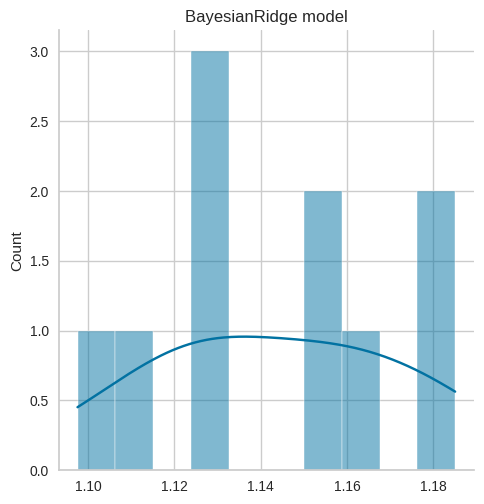

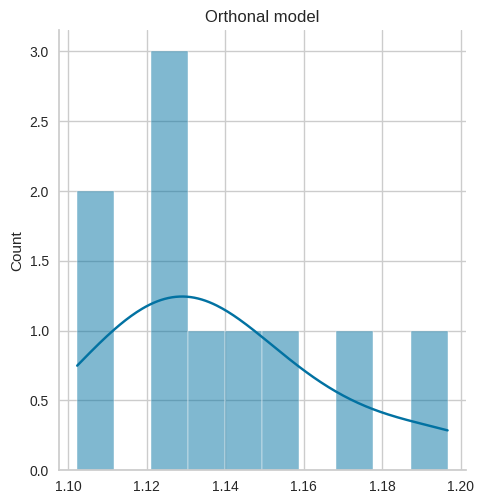

In [31]:
plt.figure(figsize=(13, 9))

sns.displot(result1, bins=10,kde=True)
plt.title("BayesianRidge model")

sns.displot(result2, bins=10,kde=True)
plt.title("Orthonal model")

plt.show()

# Sample submition set


Начальное представление данных

In [32]:
sample_submition

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


Полученное представление 

In [33]:
predictions = np.exp(first_model.predict(test_final))
submission1 = pd.concat([test_id, pd.Series(predictions, name='SalePrice')], axis=1)
submission1

,Id,SalePrice
0,1461,122387.241862
1,1462,153650.732571
2,1463,171061.314545
3,1464,191472.201547
4,1465,201035.634609
...,...,...
1454,2915,92077.282935
1455,2916,87223.232201
1456,2917,163832.438609
1457,2918,124176.754213


In [35]:
predictions = np.exp(second_model.predict(test_final))
submission2 = pd.concat([test_id, pd.Series(predictions, name='SalePrice')], axis=1)
submission2

,Id,SalePrice
0,1461,121583.827215
1,1462,163598.449705
2,1463,182949.904187
3,1464,198095.793300
4,1465,195532.567201
...,...,...
1454,2915,85017.827926
1455,2916,80523.624580
1456,2917,167703.529555
1457,2918,119356.445877


Hyperparameters Optimization

In [36]:
study.best_params

NameError: name 'study' is not defined

{'tol': 0.21021953729626613,
 'alpha_1': 0.25169038795525916,
 'alpha_2': 9.921416115771493,
 'lambda_1': 2.5959315975091957e-07,
 'lambda_2': 2.362440719530062e-06}

use best params in our models

In [37]:
third_model = linear_model.BayesianRidge(alpha_1=0.25169038795525916, alpha_2=9.921416115771493, lambda_1=2.5959315975091957e-07, lambda_2=2.362440719530062e-06, tol=0.21021953729626613)
third_model.fit(train_final, lg_target)

BayesianRidge(alpha_1=0.25169038795525916, alpha_2=9.921416115771493,
              lambda_1=2.5959315975091957e-07, lambda_2=2.362440719530062e-06,
              tol=0.21021953729626613)

In [72]:
result3 = np.exp(np.sqrt(-cross_val_score(third_model, train_final, lg_target, scoring='neg_mean_squared_error', cv=kf)))
result3.mean()

1.134691425163688

<Figure size 1300x900 with 0 Axes>

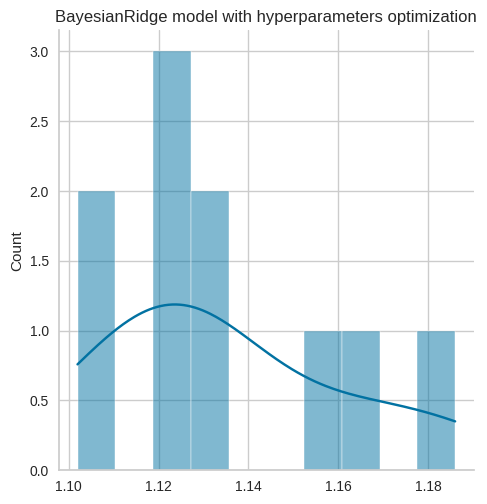

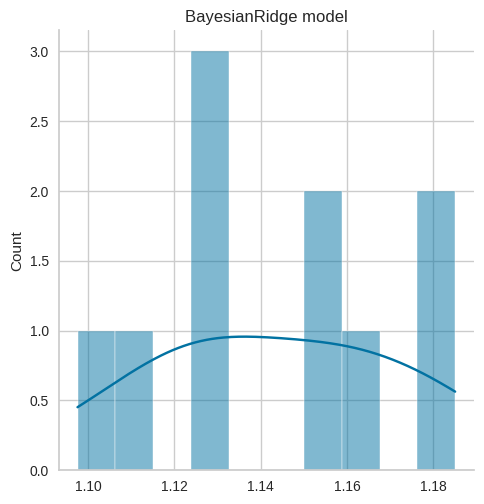

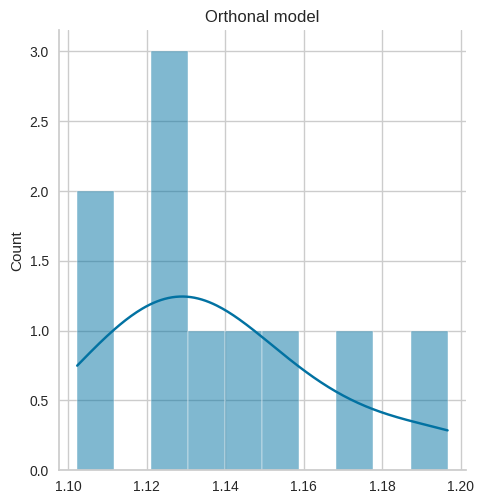

In [39]:
plt.figure(figsize=(13, 9))

sns.displot(result3, bins=10,kde=True)
plt.title("BayesianRidge model with hyperparameters optimization")

sns.displot(result1, bins=10,kde=True)
plt.title("BayesianRidge model")

sns.displot(result2, bins=10,kde=True)
plt.title("Orthonal model")

plt.show()

In [45]:
print(result1.mean())
print(result2.mean())
print(result3.mean())

1.1435014576545883
1.1380270457457606
1.134691425163688


In [40]:
predictions = np.exp(third_model.predict(test_final))
submission3 = pd.concat([test_id, pd.Series(predictions, name='SalePrice')], axis=1)
submission3

,Id,SalePrice
0,1461,121603.505681
1,1462,160772.661184
2,1463,181392.873312
3,1464,197064.829061
4,1465,193863.438364
...,...,...
1454,2915,84919.838251
1455,2916,81455.476023
1456,2917,164138.887913
1457,2918,117744.430210


Анализ важных признаков

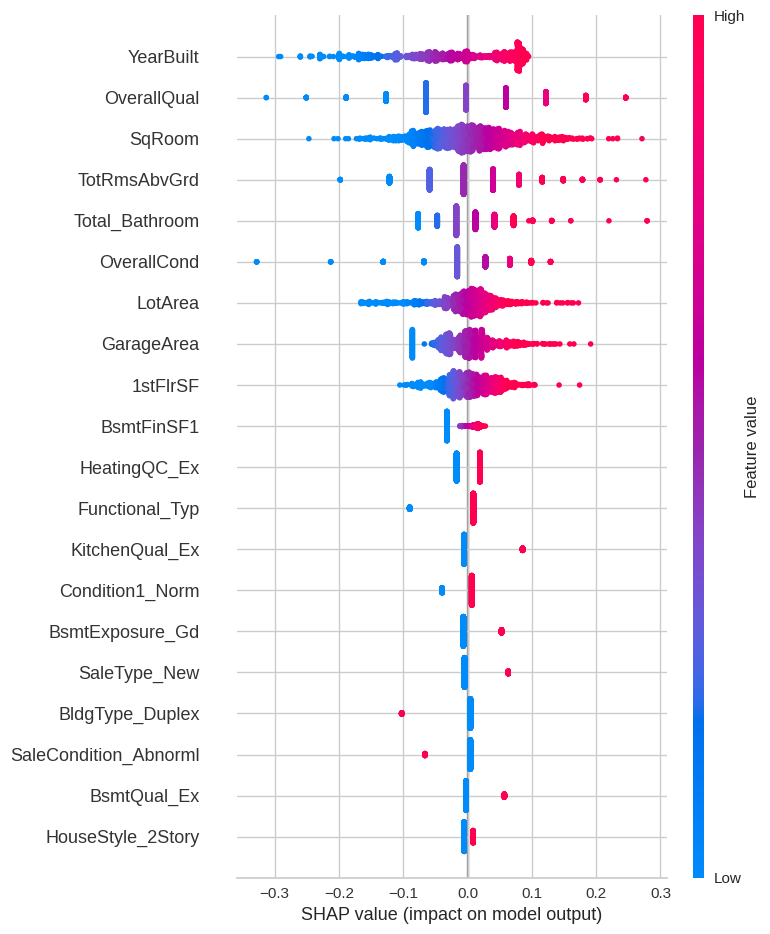

In [ ]:
import shap

explainer = shap.LinearExplainer(first_model, train_final,feature_perturbation='independent')
shap_values = explainer(test_final)

shap.summary_plot(shap_values, test_final)